<a href="https://www.kaggle.com/code/sridharstreaks/customer-segmentation-and-spending-prediction?scriptVersionId=121694561" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Customer Segmentation and Spending Prediction with EDA

**In this notebook we'll explore the given data through plots and create a ML model to Group the customer based on their demographic and spending habits. Upon trying to build a model to predict their spending i faced probelms achiving the accuracy. Which'll talk about futher below this notebook.**

**I Would be glad if some peer review my ML model and give me some improving ideas as i'm begineer to Data scien**

### Let's begin

# Loading Libraries and Dataset

In [49]:
try:
    import pandas as pd
except ImportError:
    print("Error: Could not import the pandas library.")
else:
    try:
        df = pd.read_csv("/kaggle/input/customers-dataset/Customers.csv")
    except FileNotFoundError:
        print("Error: Could not find the CSV file.")
    except pd.errors.ParserError:
        print("Error: Could not parse the CSV file.")
    else:
        print("Imported necessary libraries and loaded data successfully.")


Imported necessary libraries and loaded data successfully.


# Overviewing the Data

> peeking into sample dataframe

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


> Getting data info

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


> Descriptive statistics

In [51]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


> Checking null values

In [50]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

**As we can see that we have 35 null values in the profession not marked in our data. I could delete them but already out dataset is very small. Also i can mark them other since all other fields seems to be filled. But later in my regression model since it is a catogorical column i'll anyway encode it with any onen of the encoder which will assign a number even to nulls since it will consider them as a set of category.**

***So, For now i'm gonna leave as it is.***

# EDA through Plots


Below moving on to the actual segmentation of regression model it is good to understand more about out data. Thus i'm plotting some plots which will give more insights to our data.

> Scatter Plots

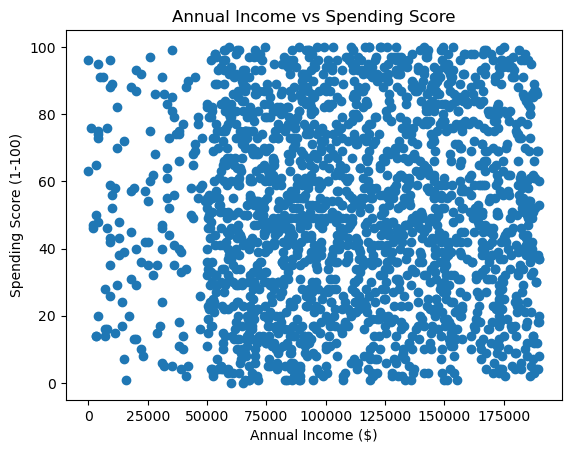

In [22]:
import matplotlib.pyplot as plt

plt.scatter(df['Annual Income ($)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()


**This shows that the spending score and annual income is all over the chart in which in turn signifies that our data might be very diversed. Actually this kind of data is very hard to segement cause one can find all kinds of patterns between millinore who spends nothing to a labour spending all of the income in a single day**

**i'll brief more of these in actual model building**

**One thing we can slightly infer is that most of the people after into the 50000-175000+ category as those where area that's too crowded**

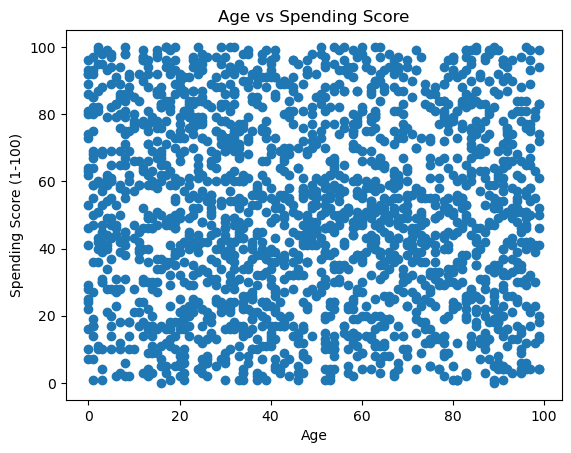

In [23]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')
plt.show()

**Here too the same story continues**

                               ----------------------------------------

> Box Plots

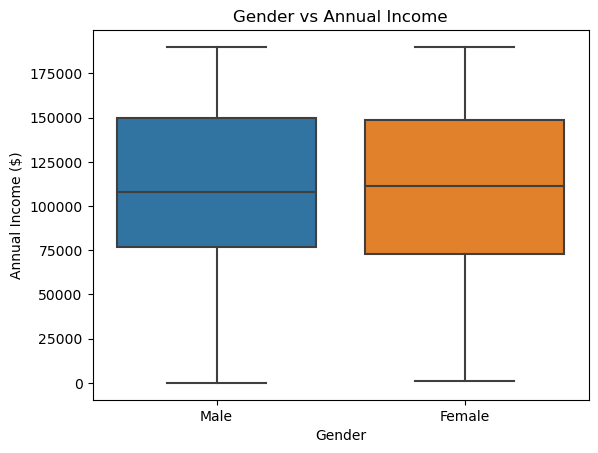

In [25]:
sns.boxplot(data=df, x='Gender', y='Annual Income ($)')
plt.xlabel('Gender')
plt.ylabel('Annual Income ($)')
plt.title('Gender vs Annual Income')
plt.show()


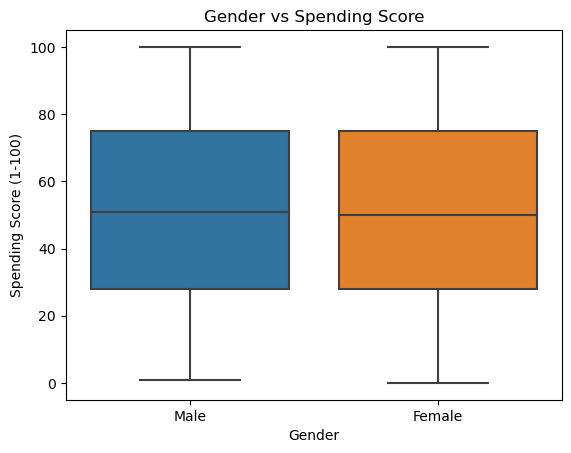

In [26]:
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Gender vs Spending Score')
plt.show()


**These box plots shows that the annual income as well as well as spending score is almost equal between men and women. This futher makes the data more complicated : (**

> Column Charts

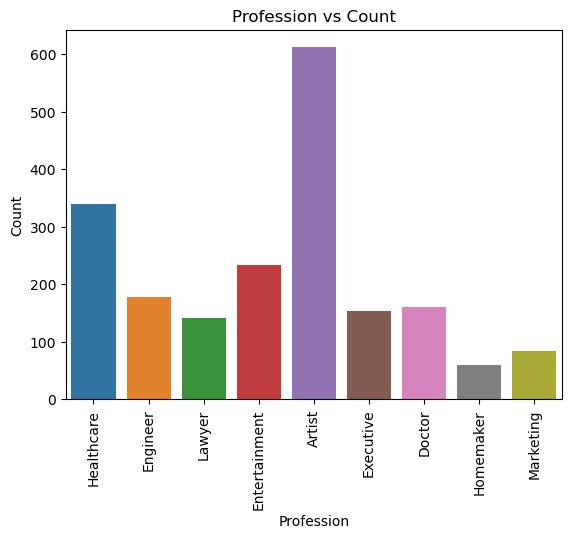

In [24]:
import seaborn as sns

sns.countplot(data=df, x='Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Profession vs Count')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Family Size')

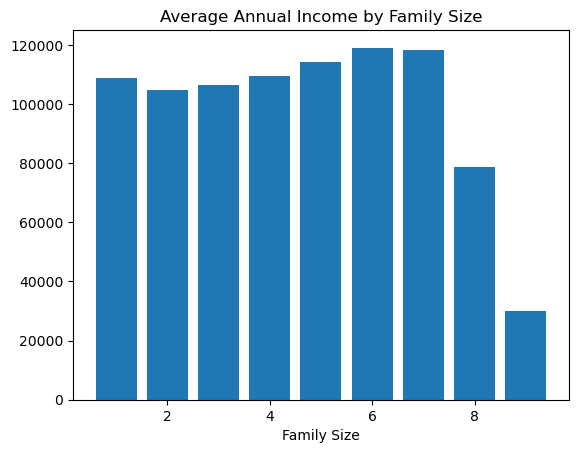

In [52]:
# Calculate average annual income by family size
family_income = data.groupby('Family Size')['Annual Income ($)'].mean().reset_index()

# Create column chart
plt.bar(family_income['Family Size'], family_income['Annual Income ($)'])
plt.title('Average Annual Income by Family Size')
plt.xlabel('Family Size')


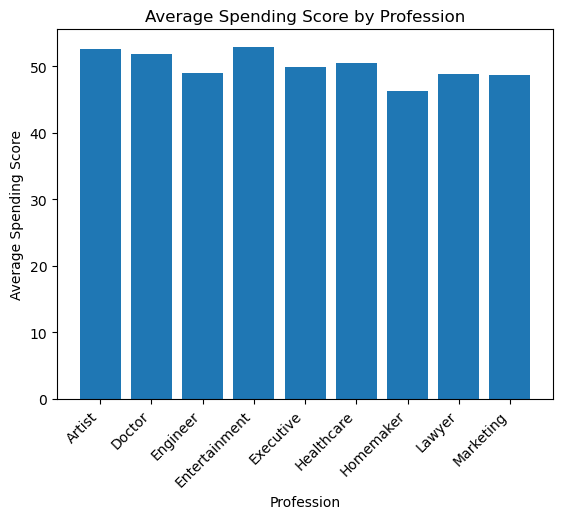

In [55]:
# Calculate average spending score by age group
age_groups = data.groupby('Profession')['Spending Score (1-100)'].mean().reset_index()

# Create column chart
plt.bar(age_groups['Profession'], age_groups['Spending Score (1-100)'])
plt.title('Average Spending Score by Profession')
plt.xlabel('Profession')
plt.ylabel('Average Spending Score')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()


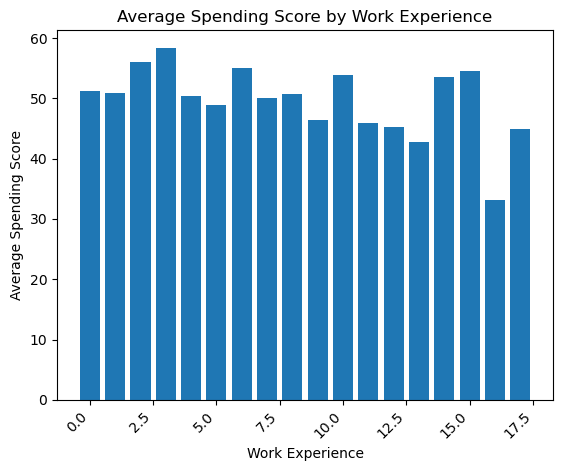

In [59]:
age_groups = data.groupby('Work Experience')['Spending Score (1-100)'].mean().reset_index()

# Create column chart
plt.bar(age_groups['Work Experience'], age_groups['Spending Score (1-100)'])
plt.title('Average Spending Score by Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Average Spending Score')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

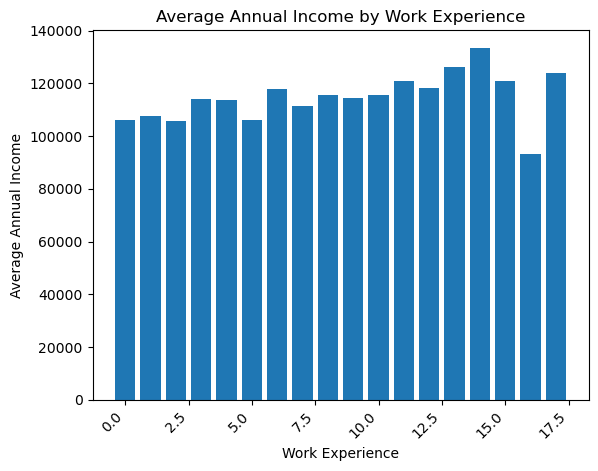

In [57]:
groups = data.groupby('Work Experience')['Annual Income ($)'].mean().reset_index()

# Create column chart
plt.bar(age_groups['Work Experience'], age_groups['Annual Income ($)'])
plt.title('Average Annual Income by Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Average Annual Income')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

**These are the column charts with some variables in our data.**

                               ----------------------------------------

***Finally, a Corr plot will give very good idea of how each variables relate to each others so, lets plot it***

<AxesSubplot:>

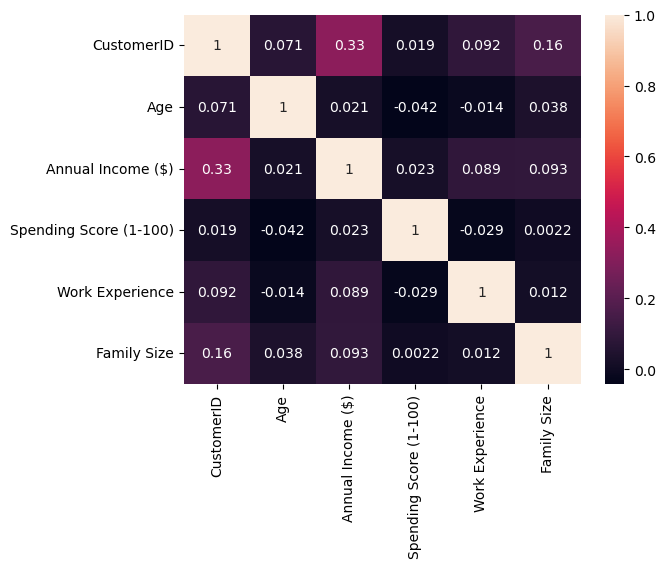

In [6]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

**As said the data and the variables pretty much have no significant postive or negative relation between each other. I guess this will severely affect the accuracy of the Ml Models.**

**Let's see how it goes**

--------------------------------------------------------------------------------------------------------

# Building ML Models

> **Linear Regression**

**As said I used lable encoder to assign each category a number as a identifier to all the available category columns.**

**Next i used the changed numeric data to perfom a liner regression on it. Finnaly, I printed the MSE and R-squared values**

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Profession'] = le.fit_transform(df['Profession'])

# Split data into training and test sets
X = df[['Age', 'Annual Income ($)', 'Profession', 'Work Experience', 'Family Size', 'Gender']]
y = df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('R-squared: ', r2)


MSE:  757.6630224306293
R-squared:  0.006040337971136012


**This is where i get into probs as my model has very low R-squared value. This us very bad since the data is simple with less variables but unfortunately very less accuracy. I belive the diveristy of the data is causing the inaccuracy. I might be wrong as well. So if other peer views my notebook pls let me know any other work arounds**

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Profession'] = le.fit_transform(df['Profession'])

# Select the features and target variables
X = df[['Age', 'Annual Income ($)', 'Profession', 'Work Experience', 'Family Size', 'Gender']]
y = df['Spending Score (1-100)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R-squared:', r2)


MSE: 818.2149193333333
R-squared: -0.04106493524128463


**I tried with Random Forest Regressor but still the same or even worse result :(**

> **Clustering Model**

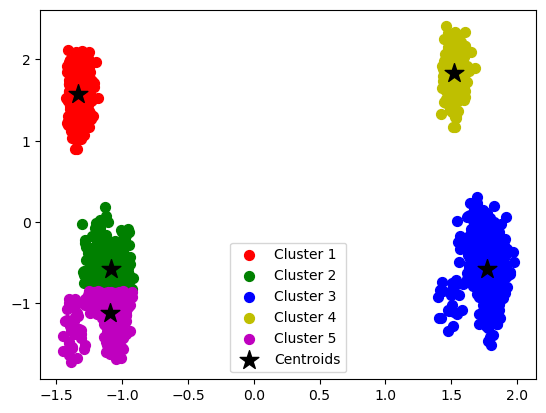

In [48]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare data
X = data[['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Profession', 'Work Experience', 'Family Size']]
X = pd.get_dummies(X) # One-hot encode categorical variables
X = StandardScaler().fit_transform(X) # Scale data

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit KMeans clustering model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.predict(X_pca)

# Visualize clusters
colors = ['r', 'g', 'b', 'y', 'm']
for i in range(len(colors)):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], s=50, c=colors[i], label='Cluster '+str(i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', c='black', label='Centroids')
plt.legend()
plt.show()

**Here are the labels for each cluster:**

* **Cluster 1 (Red): Customers with low spending score and lower income**
* **Cluster 2 (Green): Customers with high income and high spending score**
* **Cluster 3 (Blue): Customers with low income and medium spending score**
* **Cluster 4 (Yellow): Customers with medium income and medium spending score**
* **Cluster 5 (Magenta): Customers with high income and low spending score**

***Here we can see the customers are nicely segemented and plotted***

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = df.drop(['Spending Score (1-100)'], axis=1)
y = df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


# Predict the test data
y_pred = rf.predict(X_test)

ValueError: could not convert string to float: 'Male'

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 28.199680871421222


**trying to improve the model by tuning its hyperparameters, selecting more relevant features, or trying different regression models to achieve a better RMSE value.**

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor object
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', np.sqrt(-grid_search.best_score_))


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 28.133670388354844


The output "Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100} Best Score: 28.133670388354844" signifies the best combination of hyperparameters found by GridSearchCV, and the corresponding score achieved by the model using those hyperparameters. Specifically:

* 'max_depth': 5 means that the maximum depth of each decision tree in the random forest is 5.
* 'min_samples_leaf': 2 means that the minimum number of samples required to be at a leaf node in each decision tree is 2.
* 'min_samples_split': 10 means that the minimum number of samples required to split an internal node in each decision tree is 10.
* 'n_estimators': 100 means that the number of decision trees in the random forest is 100.

The best score achieved by the model using these hyperparameters is 28.133670388354844, which is the RMSE on the validation set. This is a slightly better RMSE than the previous RMSE of 28.19968 that we got before hyperparameter tuning. This means that the hyperparameter tuning process has improved the model's performance slightly.

There are several other methods you can try to improve the RMSE further for your data. Here are a few suggestions:

1. Feature engineering: we can try to create new features from the existing ones that might be more informative for the model. For example, you could create a feature that represents the ratio of annual income to age, or the ratio of spending score to family size.

2. Ensemble methods: we can try using ensemble methods such as Gradient Boosting or XGBoost, which are often able to achieve better performance than a single model. These methods train multiple weak models and combine their predictions to make a final prediction.

3. Regularization: we can try using regularization techniques such as L1 or L2 regularization, or dropout, to prevent overfitting of the model to the training data. These techniques add a penalty term to the loss function to discourage the model from learning complex patterns in the training data that may not generalize well to new data.

4. Data preprocessing: we can try preprocessing the data in different ways, such as scaling or normalizing the features, or encoding categorical variables in different ways. These preprocessing steps can help the model learn the patterns in the data more effectively.

5. Larger dataset: we can try collecting more data if possible, as having more data often improves the performance of machine learning models.

**Feature engineering:**

**Let's create a new feature called "Income per Age" which represents the ratio of Annual Income to Age:**

In [12]:
df['Income per Age'] = df['Annual Income ($)'] / df['Age']

**Ensemble methods:**
**Tried using the XGBoost algorithm**

In [14]:
import xgboost as xgb

# Convert the data to DMatrix format required by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_test, label=y_test)

# Define the hyperparameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the XGBoost model
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=50,
    evals=[(dtrain, 'train'), (dval, 'val')],
    verbose_eval=10
)


[0]	train-rmse:53.31526	val-rmse:53.33691
[10]	train-rmse:30.85927	val-rmse:32.09648
[20]	train-rmse:26.02780	val-rmse:28.73679
[30]	train-rmse:24.38522	val-rmse:28.44249
[40]	train-rmse:23.32130	val-rmse:28.57065
[50]	train-rmse:22.43359	val-rmse:28.95304
[60]	train-rmse:21.59370	val-rmse:29.09295
[70]	train-rmse:20.73535	val-rmse:29.10549
[79]	train-rmse:20.19615	val-rmse:29.16641


In [17]:
# Make predictions on the validation set and calculate RMSE
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Validation RMSE:', rmse)

Validation RMSE: 28.95303572017266


**Ensemble methods:**
**Tried using the XGBoost algorithm**

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model with L2 regularization
rf = RandomForestRegressor(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=10,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.01,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.01, random_state=42)

In [19]:
# Predict the test data
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 27.756065978125577


##### *I'll end here cause it will get more complicated if we tried other methods also i'm not well expertise of those too. Any help would be great to improve my models. Hope this notebook was informative, pls upvote if found insightful.*

# The End